Naive Bayes classifier (using amazon reviews) performing sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Data obtained from here https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

In [193]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
reviews = pd.read_csv('data\\sentiment labelled sentences\\yelp_labelled.txt', delimiter= '\t', header=None)

In [195]:
reviews.shape

(1000, 2)

In [196]:
reviews.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [197]:
keywords = ['worst',
           'hate',
           'terrible',
           'horrible',
           'worst',
           'cheap', 
           'love',
           'great',        
           'best',
           'amazing',          
           'quality']


# create column for each keyword above
# return bool value if keyword found
for key in keywords:
    reviews[str(key)] = reviews[0].str.contains(
        ' ' + str(key) + ' ',
        case=False)

In [198]:
# convert spam column into boolean 
reviews[1] = (reviews[1] == 1)

In [199]:
reviews.head()

,0,1,worst,hate,terrible,horrible,cheap,love,great,best,amazing,quality
0,Wow... Loved this place.,True,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False,True,False,False,False


(11.0, 0.0)

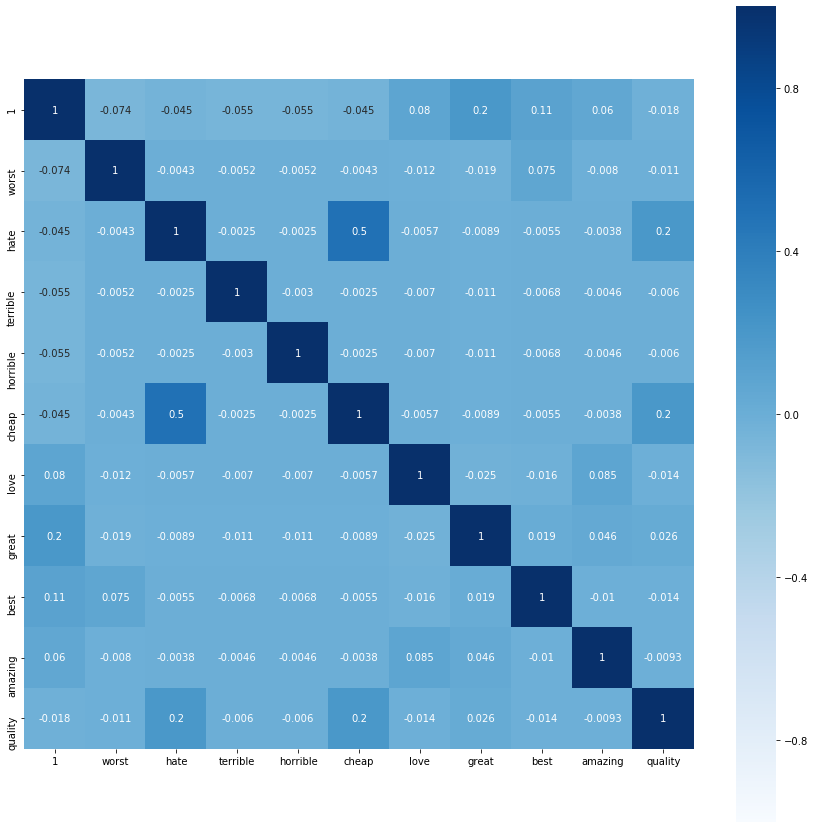

In [200]:
# visualize how well specific keywords perform
plt.figure(figsize=(15, 15))

ax = sns.heatmap(reviews.corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, annot=True, 
                 cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [201]:
# create variables that can easily
# be fed into naive bayes below
data = reviews[keywords]
target = reviews[1]

In [202]:
data.head()

,worst,hate,terrible,horrible,worst,cheap,love,great,best,amazing,quality
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False


In [203]:
target.head()

0     True
1    False
2    False
3     True
4     True
Name: 1, dtype: bool

In [204]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [205]:
y_pred[0:10]

array([False, False, False, False,  True, False, False, False,  True,
        True])

In [206]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 438


### Create confustion matrix to review performance

In [207]:
# create empty matrix
c_matrix = pd.DataFrame(
    index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes']
)

In [208]:
c_matrix.iloc[0,0] = sum((y_pred == False) & (target == False))

In [209]:
c_matrix.iloc[0,1] = sum((y_pred == True) & (target == False))

In [210]:
c_matrix.iloc[1,0] = sum((y_pred == False) & (target == True))

In [211]:
c_matrix.iloc[1,1] = sum((y_pred == True) & (target == True))

In [212]:
c_matrix

,Predicted: No,Predicted: Yes
Actual: No,495,5
Actual: Yes,433,67


In [213]:
# Sensitivity - the percent of total positives correctly identified

round(sum((y_pred == True) & (target == True)) / \
sum(target == True), 2)

0.13

this seems like a very low number

In [214]:
# Specificity - percent of total negatives correctly identified

round(sum((y_pred == False) & (target == False)) / \
sum(target == False), 2)

0.99

### Compare/contrast with different holdout groups

In [215]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
# does test_size mean 20% of total data?
# what does random_state mean?

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.575
Testing on Sample: 0.562


What does it mean that my model is performing better with the 20% holdout?

In [216]:
# use sklearn cross_val_score to 
# experiment with a more advanced 
# techniqe of using holdout groups

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=5)

array([0.57, 0.53, 0.55, 0.58, 0.58])

#### Cross Validation - rather than use sklearn, try to build on my own

In [217]:
# bin data into 5 bins
reviews['cv_bins'] = pd.cut(reviews.index, 5, labels=[1,2,3,4,5])

In [219]:
reviews.head()

,0,1,worst,hate,terrible,horrible,cheap,love,great,best,amazing,quality,cv_bins
0,Wow... Loved this place.,True,False,False,False,False,False,False,False,False,False,False,1
1,Crust is not good.,False,False,False,False,False,False,False,False,False,False,False,1
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,False,False,1
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False,False,False,False,False,1
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False,True,False,False,False,1


In [235]:
# iterate through bins
# analyzing the training folds
# against each of the holdout folds

for bin in range(1, 6):
    # use tilde(~) to negate and group all other bins
    # as the train data
    X_train = reviews[~(reviews.cv_bins == bin)].iloc[:,2:12]
    y_train = reviews[~(reviews.cv_bins == bin)].iloc[:,1]
    
    # test data
    X_test = reviews[reviews.cv_bins == bin].iloc[:,2:12]
    y_test = reviews[reviews.cv_bins == bin].iloc[:,1]
    
    
    print(f'Bin {bin} being held out: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))

Bin 1 being held out: 0.52
Bin 2 being held out: 0.495
Bin 3 being held out: 0.51
Bin 4 being held out: 0.48
Bin 5 being held out: 0.275


these don't agree with the sklearn cross_val_score above